# Where's waldo Optimal Path using ML Algorithms

## Libraries Needed
The below cell contains all the import statements
The libraries used are numpy, matpolotlib, pandas, seaborn

In [5]:
# Import statements
from __future__ import print_function
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import random
import math

sb.set_style("white")

wheres_waldo_locations = pd.read_csv("wheres-waldo-locations.csv")
wheres_waldo_locations.describe()

,Book,Page,X,Y
count,68.000000,68.000000,68.000000,68.000000
mean,3.514706,6.058824,6.700776,3.875306
std,1.856756,3.411492,3.703276,1.941349
min,1.000000,1.000000,0.625000,0.333333
25%,2.000000,3.000000,3.513889,2.250000
50%,3.000000,6.000000,6.694444,3.927083
75%,5.000000,9.000000,10.062500,5.291667
max,7.000000,12.000000,12.444444,7.708333


## Visualization of Dataset
Now we will Plot the dots from the dataset which are according to various books 
Dashed line is used as a divider

''

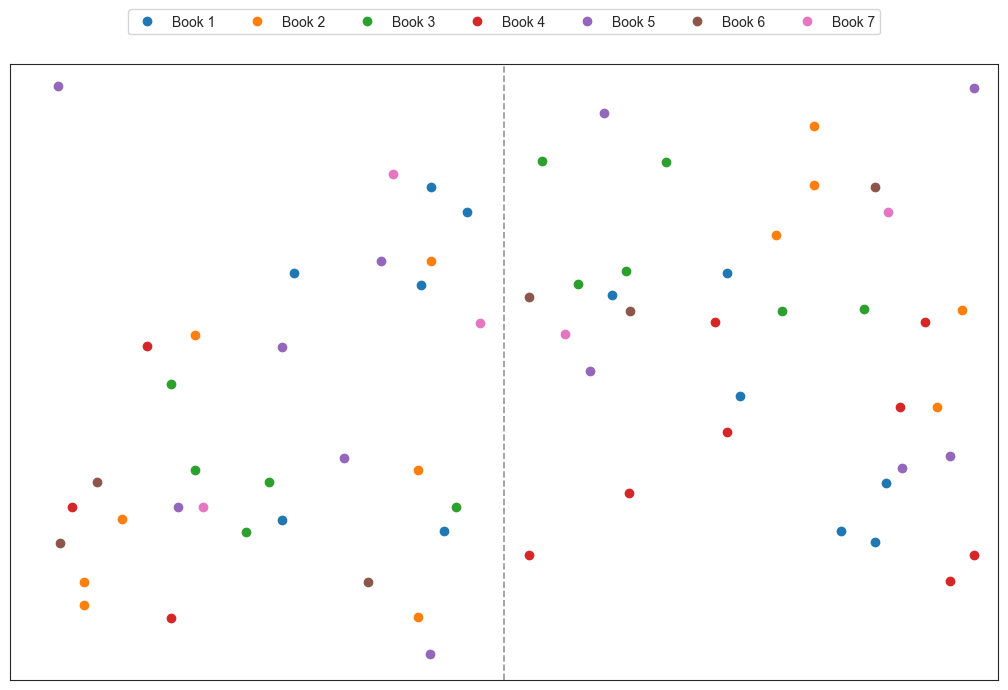

In [6]:
# Plot the values
plt.figure(figsize=(12.75, 8))
plt.plot([6.375, 6.375], [0, 8], "--", color="black", alpha=0.4, lw=1.25)

# Iterateing over dataset
for book, group in wheres_waldo_locations.groupby("Book"):
    plt.plot(group.X, group.Y, "o", label="Book %d" % (book))

plt.xlim(0, 12.75)
plt.ylim(0, 8)
plt.xticks([])
plt.yticks([])
plt.legend(loc="upper center", ncol=7, frameon=True, fancybox=True, bbox_to_anchor=(0.5, 1.1))
;



## Kernel Density for the Points
From Kernel density we can identify the hotspots for finding Waldo. For this we have used seaborn library

([], [])

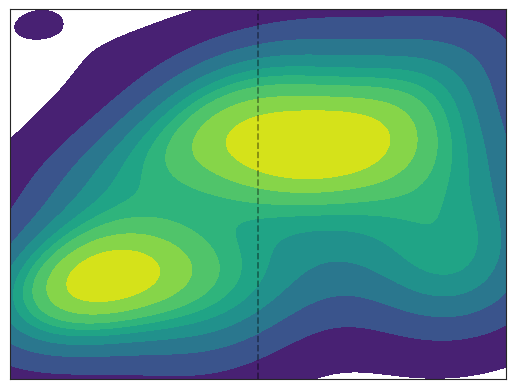

In [7]:
sb.kdeplot(data=wheres_waldo_locations, x="X", y="Y", fill=True, cmap="viridis")
plt.plot([6.375, 6.375], [0, 8], "--", color="black", alpha=0.4, lw=1.25)
plt.xlim(0, 12.75)
plt.ylim(0, 8)
plt.xlabel("")
plt.ylabel("")
plt.xticks([])
plt.yticks([])

## Dictionary over Dataframe
Here we have changed the data such that the waldo locations are stored in dictionary instead of dataframe because using dictionary means the data can be fetched at fast.

In [8]:
waldo_location_map = {}

for i, record in wheres_waldo_locations.iterrows():
    key = "B%dP%d" % (record.Book, record.Page)
    waldo_location_map[key] = (record.X, record.Y)

## Genetic Algorithm
Here we are implementing the genetic algorithm.

In [9]:
def calculate_distance(x1, y1, x2, y2):
    """
        Returns the Euclidean distance between points (x1, y1) and (x2, y2)
    """
    return math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 )

def compute_fitness(solution):
    """
        Computes the distance that the Waldo-seeking solution covers.
        
        Lower distance is better, so the GA should try to minimize this function.
    """
    solution_fitness = 0.0
    
    for index in range(1, len(solution)):
        w1 = solution[index]
        w2 = solution[index - 1]
        solution_fitness += calculate_distance(waldo_location_map[w1][0], waldo_location_map[w1][1],
                                               waldo_location_map[w2][0], waldo_location_map[w2][1])
        
    return solution_fitness

def generate_random_agent():
    """
        Creates a random Waldo-seeking path.
    """
    new_random_agent = list(waldo_location_map.keys())
    random.shuffle(new_random_agent)
    return tuple(new_random_agent)


def mutate_agent(agent_genome, max_mutations=3):
    """
        Applies 1 - `max_mutations` point mutations to the given Waldo-seeking path.
        
        A point mutation swaps the order of two locations in the Waldo-seeking path.
    """
    agent_genome = list(agent_genome)
    num_mutations = random.randint(1, max_mutations)
    
    for mutation in range(num_mutations):
        swap_index1 = random.randint(0, len(agent_genome) - 1)
        swap_index2 = swap_index1

        while swap_index1 == swap_index2:
            swap_index2 = random.randint(0, len(agent_genome) - 1)

        agent_genome[swap_index1], agent_genome[swap_index2] = agent_genome[swap_index2], agent_genome[swap_index1]
            
    return tuple(agent_genome)

def shuffle_mutation(agent_genome):
    """
        Applies a single shuffle mutation to the given Waldo-seeking path.
        
        A shuffle mutation takes a random sub-section of the path and moves it to
        another location in the path.
    """
    agent_genome = list(agent_genome)
    
    start_index = random.randint(0, len(agent_genome) - 1)
    length = random.randint(2, 20)
    
    genome_subset = agent_genome[start_index:start_index + length]
    agent_genome = agent_genome[:start_index] + agent_genome[start_index + length:]
    
    insert_index = random.randint(0, len(agent_genome) + len(genome_subset) - 1)
    agent_genome = agent_genome[:insert_index] + genome_subset + agent_genome[insert_index:]
    
    return tuple(agent_genome)

def generate_random_population(pop_size):
    """
        Generates a list with `pop_size` number of random Waldo-seeking paths.
    """
    random_population = []
    for agent in range(pop_size):
        random_population.append(generate_random_agent())
    return random_population

def plot_trajectory(agent_genome):
    """
        Create a visualization of the given Waldo-seeking path.
    """
    agent_xs = []
    agent_ys = []
    agent_fitness = compute_fitness(agent_genome)

    for waldo_loc in agent_genome:
        agent_xs.append(waldo_location_map[waldo_loc][0])
        agent_ys.append(waldo_location_map[waldo_loc][1])

    plt.figure()
    plt.title("Fitness: %f" % (agent_fitness))
    plt.plot(agent_xs[:18], agent_ys[:18], "-o", markersize=7)
    plt.plot(agent_xs[17:35], agent_ys[17:35], "-o", markersize=7)
    plt.plot(agent_xs[34:52], agent_ys[34:52], "-o", markersize=7)
    plt.plot(agent_xs[51:], agent_ys[51:], "-o", markersize=7)
    plt.plot(agent_xs[0], agent_ys[0], "^", color="#1f77b4", markersize=15)
    plt.plot(agent_xs[-1], agent_ys[-1], "v", color="#d62728", markersize=15)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
def run_genetic_algorithm(generations=10000, population_size=100):
    """
        The core of the Genetic Algorithm.
        
        `generations` and `population_size` must be a multiple of 10.
    """
    
    population_subset_size = int(population_size / 10.)
    generations_10pct = int(generations / 10.)
    
    # Create a random population of `population_size` number of solutions.
    population = generate_random_population(population_size)

    # For `generations` number of repetitions...
    for generation in range(int(generations)):
        
        # Compute the fitness of the entire current population
        population_fitness = {}

        for agent_genome in population:
            if agent_genome in population_fitness:
                continue

            population_fitness[agent_genome] = compute_fitness(agent_genome)

        # Take the top 10% shortest paths and produce offspring from each of them
        new_population = []
        for rank, agent_genome in enumerate(sorted(population_fitness,
                                                   key=population_fitness.get)[:population_subset_size]):

            if (generation % generations_10pct == 0 or generation == (generations - 1)) and rank == 0:
                print(agent_genome)
                print("\nGeneration %d Best Fitness is given as: %f" % (generation, population_fitness[agent_genome]))
                plot_trajectory(agent_genome)

            # Create 1 exact copy of each top path
            new_population.append(agent_genome)

            # Create 4 offspring with 1-3 mutations
            for offspring in range(4):
                new_population.append(mutate_agent(agent_genome, 3))
                
            # Create 5 offspring with a single shuffle mutation
            for offspring in range(5):
                new_population.append(shuffle_mutation(agent_genome))

        # Replace the old population with the new population of offspring
        for i in range(len(population))[::-1]:
            del population[i]

        population = new_population

## Running the Code
We are the running the genetic algorithm, with population size of 100 and total generations is 10000.

('B5P10', 'B3P10', 'B7P7', 'B2P6', 'B4P2', 'B6P5', 'B4P4', 'B6P11', 'B2P11', 'B1P2', 'B1P6', 'B5P11', 'B1P3', 'B3P5', 'B4P1', 'B3P3', 'B3P6', 'B5P2', 'B2P9', 'B3P1', 'B1P10', 'B5P1', 'B3P11', 'B4P9', 'B6P8', 'B2P12', 'B7P3', 'B2P2', 'B7P2', 'B6P2', 'B5P8', 'B7P1', 'B2P3', 'B2P7', 'B3P7', 'B7P6', 'B5P9', 'B4P5', 'B4P10', 'B4P3', 'B3P8', 'B5P6', 'B2P1', 'B4P7', 'B1P1', 'B3P2', 'B5P5', 'B2P8', 'B2P5', 'B4P11', 'B4P6', 'B3P9', 'B3P4', 'B4P8', 'B6P1', 'B1P11', 'B2P4', 'B2P10', 'B6P12', 'B5P3', 'B1P5', 'B1P7', 'B1P4', 'B5P7', 'B1P12', 'B5P4', 'B1P8', 'B1P9')

Generation 0 Best Fitness is given as: 302.814378


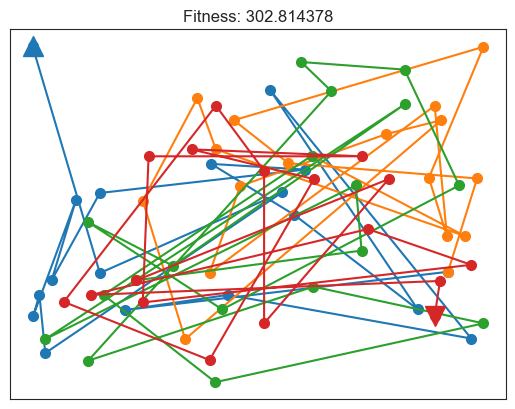

('B5P10', 'B4P4', 'B2P11', 'B3P2', 'B3P10', 'B5P4', 'B2P4', 'B6P11', 'B4P2', 'B6P5', 'B2P5', 'B2P6', 'B4P3', 'B7P6', 'B3P6', 'B3P9', 'B1P4', 'B5P5', 'B2P12', 'B3P3', 'B6P2', 'B2P10', 'B5P9', 'B1P1', 'B4P8', 'B4P10', 'B5P11', 'B1P2', 'B3P1', 'B7P7', 'B6P1', 'B7P3', 'B2P3', 'B1P6', 'B5P8', 'B1P7', 'B5P3', 'B1P10', 'B7P1', 'B1P11', 'B3P5', 'B5P6', 'B3P8', 'B3P7', 'B6P12', 'B4P11', 'B1P5', 'B3P4', 'B1P12', 'B4P6', 'B1P3', 'B1P9', 'B4P1', 'B4P5', 'B5P7', 'B1P8', 'B5P2', 'B2P7', 'B4P9', 'B2P9', 'B4P7', 'B3P11', 'B2P2', 'B2P8', 'B2P1', 'B7P2', 'B6P8', 'B5P1')

Generation 1000 Best Fitness is given as: 64.841867


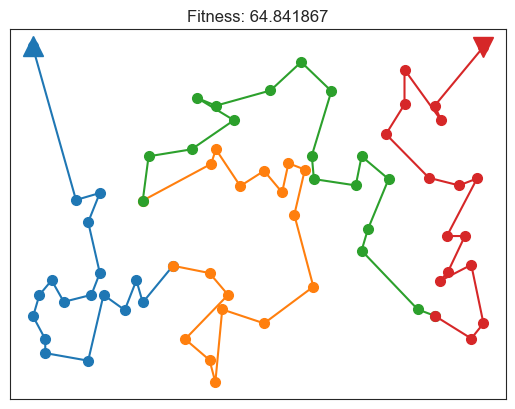

('B5P10', 'B4P4', 'B2P11', 'B3P2', 'B3P10', 'B7P6', 'B5P4', 'B2P4', 'B6P11', 'B4P2', 'B6P5', 'B2P5', 'B2P6', 'B4P3', 'B3P6', 'B3P9', 'B1P4', 'B5P5', 'B2P12', 'B3P3', 'B1P1', 'B6P2', 'B2P10', 'B5P9', 'B4P8', 'B4P10', 'B5P11', 'B6P12', 'B3P7', 'B1P2', 'B3P1', 'B7P7', 'B6P1', 'B7P3', 'B1P6', 'B5P8', 'B1P7', 'B5P3', 'B2P3', 'B1P11', 'B7P1', 'B1P10', 'B3P5', 'B5P6', 'B3P8', 'B1P5', 'B4P11', 'B3P4', 'B1P12', 'B4P6', 'B1P3', 'B1P9', 'B4P5', 'B4P1', 'B1P8', 'B5P2', 'B5P7', 'B2P7', 'B4P9', 'B2P9', 'B4P7', 'B3P11', 'B2P2', 'B2P8', 'B2P1', 'B6P8', 'B7P2', 'B5P1')

Generation 2000 Best Fitness is given as: 62.051675


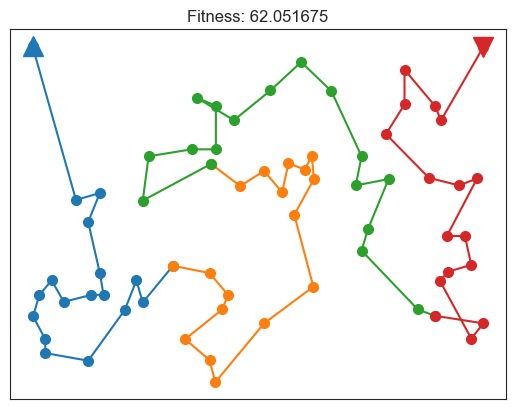

('B5P10', 'B4P4', 'B2P11', 'B3P2', 'B3P10', 'B7P6', 'B5P4', 'B2P4', 'B6P11', 'B4P2', 'B6P5', 'B2P5', 'B2P6', 'B4P3', 'B3P6', 'B1P4', 'B3P9', 'B5P5', 'B2P12', 'B3P3', 'B1P1', 'B6P2', 'B2P10', 'B5P9', 'B4P8', 'B4P10', 'B5P11', 'B6P12', 'B1P2', 'B3P7', 'B3P1', 'B7P7', 'B6P1', 'B7P3', 'B5P8', 'B1P7', 'B5P3', 'B1P6', 'B2P3', 'B7P1', 'B1P11', 'B1P10', 'B3P5', 'B5P6', 'B3P8', 'B1P5', 'B3P4', 'B4P11', 'B1P12', 'B4P6', 'B1P3', 'B1P9', 'B4P1', 'B4P5', 'B5P7', 'B5P2', 'B1P8', 'B4P9', 'B2P7', 'B2P9', 'B4P7', 'B3P11', 'B2P2', 'B2P8', 'B2P1', 'B6P8', 'B7P2', 'B5P1')

Generation 3000 Best Fitness is given as: 61.236746


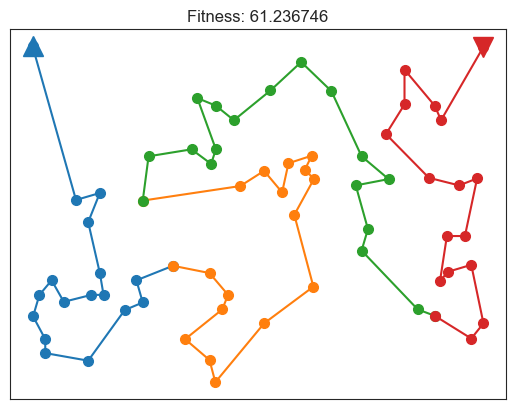

('B5P10', 'B1P7', 'B5P8', 'B2P11', 'B4P4', 'B3P2', 'B3P10', 'B7P6', 'B5P4', 'B2P4', 'B6P11', 'B4P2', 'B6P5', 'B2P5', 'B2P6', 'B4P3', 'B3P6', 'B1P4', 'B3P9', 'B5P5', 'B2P12', 'B3P3', 'B1P1', 'B6P2', 'B2P10', 'B5P9', 'B4P8', 'B4P10', 'B5P11', 'B7P7', 'B3P1', 'B6P12', 'B3P7', 'B1P2', 'B6P1', 'B7P3', 'B2P3', 'B1P6', 'B5P3', 'B7P1', 'B1P11', 'B1P10', 'B3P5', 'B5P6', 'B3P8', 'B1P5', 'B4P11', 'B1P12', 'B4P6', 'B1P3', 'B1P9', 'B4P1', 'B4P5', 'B5P7', 'B1P8', 'B5P2', 'B4P9', 'B2P7', 'B2P9', 'B4P7', 'B3P11', 'B3P4', 'B2P2', 'B2P8', 'B2P1', 'B6P8', 'B7P2', 'B5P1')

Generation 4000 Best Fitness is given as: 59.699007


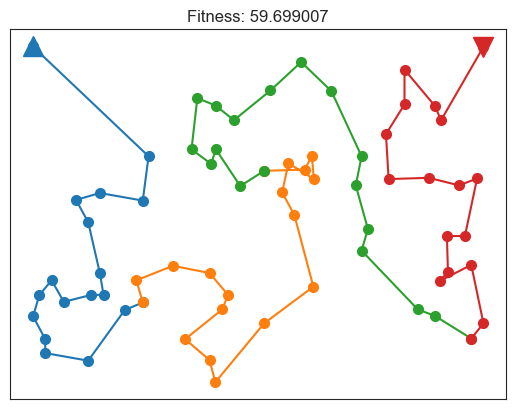

('B5P10', 'B1P7', 'B5P8', 'B2P11', 'B4P4', 'B3P2', 'B3P10', 'B7P6', 'B5P4', 'B2P4', 'B6P11', 'B4P2', 'B6P5', 'B2P5', 'B2P6', 'B4P3', 'B3P6', 'B1P4', 'B3P9', 'B5P5', 'B2P12', 'B3P3', 'B1P1', 'B6P2', 'B2P10', 'B5P9', 'B4P8', 'B4P10', 'B5P11', 'B7P7', 'B6P12', 'B3P7', 'B1P2', 'B3P1', 'B6P1', 'B7P3', 'B2P3', 'B1P6', 'B5P3', 'B7P1', 'B1P11', 'B1P10', 'B3P5', 'B5P6', 'B3P8', 'B1P5', 'B4P11', 'B1P12', 'B4P6', 'B1P3', 'B1P9', 'B4P1', 'B4P5', 'B5P7', 'B5P2', 'B1P8', 'B4P9', 'B2P7', 'B2P9', 'B4P7', 'B3P11', 'B3P4', 'B2P2', 'B2P8', 'B2P1', 'B6P8', 'B7P2', 'B5P1')

Generation 5000 Best Fitness is given as: 59.167340


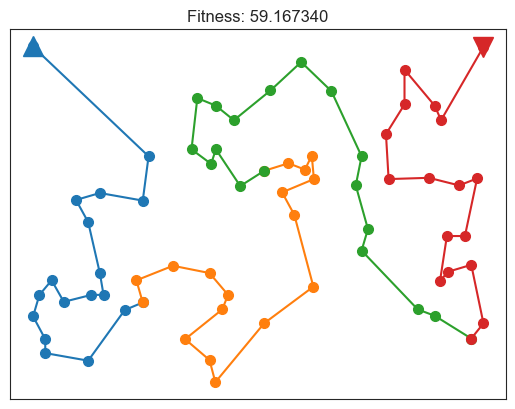

('B5P10', 'B1P7', 'B5P8', 'B2P11', 'B4P4', 'B3P2', 'B3P10', 'B7P6', 'B5P4', 'B2P4', 'B6P11', 'B4P2', 'B6P5', 'B2P5', 'B2P6', 'B4P3', 'B3P6', 'B1P4', 'B3P9', 'B5P5', 'B2P12', 'B3P3', 'B1P1', 'B6P2', 'B2P10', 'B5P9', 'B4P8', 'B4P10', 'B5P11', 'B7P7', 'B6P12', 'B3P7', 'B1P2', 'B3P1', 'B6P1', 'B7P3', 'B1P6', 'B2P3', 'B5P3', 'B7P1', 'B1P11', 'B1P10', 'B3P5', 'B5P6', 'B3P8', 'B1P5', 'B4P11', 'B1P12', 'B4P6', 'B1P3', 'B1P9', 'B4P1', 'B4P5', 'B1P8', 'B5P2', 'B5P7', 'B2P7', 'B4P9', 'B2P9', 'B4P7', 'B3P11', 'B3P4', 'B2P2', 'B2P8', 'B2P1', 'B6P8', 'B7P2', 'B5P1')

Generation 6000 Best Fitness is given as: 59.064084


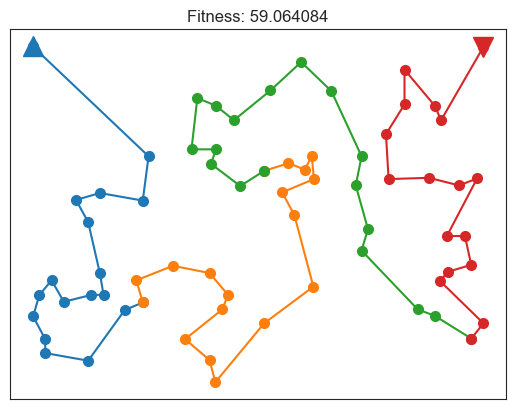

('B5P10', 'B1P7', 'B5P8', 'B2P11', 'B4P4', 'B3P2', 'B3P10', 'B7P6', 'B5P4', 'B2P4', 'B6P11', 'B4P2', 'B6P5', 'B2P5', 'B2P6', 'B4P3', 'B3P6', 'B1P4', 'B3P9', 'B5P5', 'B2P12', 'B3P3', 'B1P1', 'B6P2', 'B2P10', 'B5P9', 'B4P8', 'B4P10', 'B5P11', 'B7P7', 'B6P12', 'B1P2', 'B3P7', 'B3P1', 'B6P1', 'B7P3', 'B1P6', 'B2P3', 'B5P3', 'B7P1', 'B1P11', 'B1P10', 'B3P5', 'B5P6', 'B3P8', 'B1P5', 'B4P11', 'B1P12', 'B4P6', 'B1P3', 'B1P9', 'B4P1', 'B4P5', 'B1P8', 'B5P2', 'B5P7', 'B2P7', 'B4P9', 'B2P9', 'B4P7', 'B3P11', 'B3P4', 'B2P2', 'B2P8', 'B2P1', 'B6P8', 'B7P2', 'B5P1')

Generation 7000 Best Fitness is given as: 59.043112


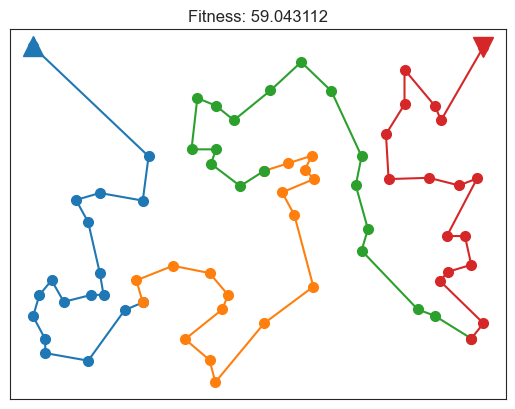

('B5P10', 'B1P7', 'B5P8', 'B2P11', 'B4P4', 'B3P2', 'B3P10', 'B7P6', 'B5P4', 'B2P4', 'B6P11', 'B4P2', 'B6P5', 'B2P5', 'B2P6', 'B4P3', 'B3P6', 'B1P4', 'B3P9', 'B5P5', 'B2P12', 'B3P3', 'B1P1', 'B6P2', 'B2P10', 'B5P9', 'B4P8', 'B4P10', 'B5P11', 'B7P7', 'B6P12', 'B1P2', 'B3P7', 'B3P1', 'B6P1', 'B7P3', 'B1P6', 'B2P3', 'B5P3', 'B7P1', 'B1P11', 'B1P10', 'B3P5', 'B5P6', 'B3P8', 'B1P5', 'B4P11', 'B1P12', 'B4P6', 'B1P3', 'B1P9', 'B4P1', 'B4P5', 'B1P8', 'B5P2', 'B5P7', 'B2P7', 'B4P9', 'B2P9', 'B4P7', 'B3P11', 'B3P4', 'B2P2', 'B2P8', 'B2P1', 'B6P8', 'B7P2', 'B5P1')

Generation 8000 Best Fitness is given as: 59.043112


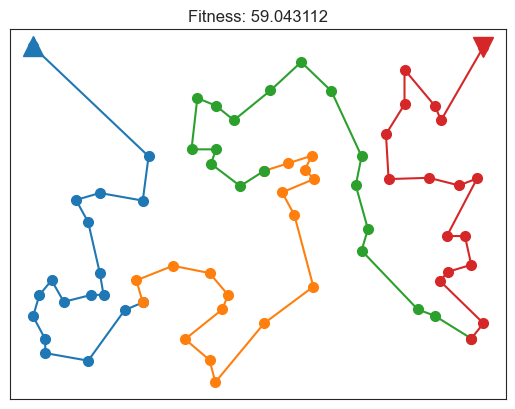

('B5P10', 'B1P7', 'B5P8', 'B2P11', 'B4P4', 'B3P2', 'B3P10', 'B7P6', 'B5P4', 'B2P4', 'B6P11', 'B4P2', 'B6P5', 'B2P5', 'B2P6', 'B4P3', 'B3P6', 'B1P4', 'B3P9', 'B5P5', 'B2P12', 'B3P3', 'B1P1', 'B6P2', 'B2P10', 'B5P9', 'B4P8', 'B4P10', 'B5P11', 'B7P7', 'B6P12', 'B1P2', 'B3P7', 'B3P1', 'B6P1', 'B7P3', 'B1P6', 'B2P3', 'B5P3', 'B7P1', 'B1P11', 'B1P10', 'B3P5', 'B5P6', 'B3P8', 'B1P5', 'B4P11', 'B1P12', 'B4P6', 'B1P3', 'B1P9', 'B4P1', 'B4P5', 'B1P8', 'B5P2', 'B5P7', 'B2P7', 'B4P9', 'B2P9', 'B4P7', 'B3P11', 'B3P4', 'B2P2', 'B2P8', 'B2P1', 'B6P8', 'B7P2', 'B5P1')

Generation 9000 Best Fitness is given as: 59.043112


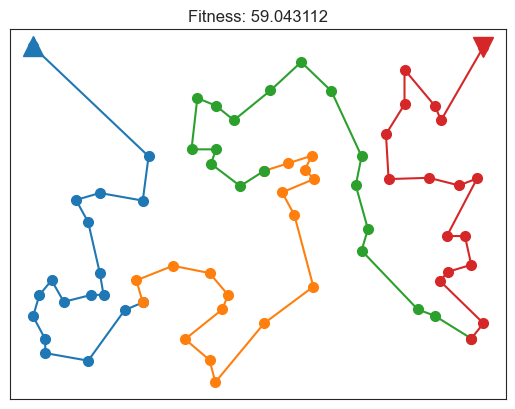

('B5P10', 'B1P7', 'B5P8', 'B2P11', 'B4P4', 'B3P2', 'B3P10', 'B7P6', 'B5P4', 'B2P4', 'B6P11', 'B4P2', 'B6P5', 'B2P5', 'B2P6', 'B4P3', 'B3P6', 'B1P4', 'B3P9', 'B5P5', 'B2P12', 'B3P3', 'B1P1', 'B6P2', 'B2P10', 'B5P9', 'B4P8', 'B4P10', 'B5P11', 'B7P7', 'B6P12', 'B1P2', 'B3P7', 'B3P1', 'B6P1', 'B7P3', 'B1P6', 'B2P3', 'B5P3', 'B7P1', 'B1P11', 'B1P10', 'B3P5', 'B5P6', 'B3P8', 'B1P5', 'B4P11', 'B1P12', 'B4P6', 'B1P3', 'B1P9', 'B4P1', 'B4P5', 'B1P8', 'B5P2', 'B5P7', 'B2P7', 'B4P9', 'B2P9', 'B4P7', 'B3P11', 'B3P4', 'B2P2', 'B2P8', 'B2P1', 'B6P8', 'B7P2', 'B5P1')

Generation 9999 Best Fitness is given as: 59.043112


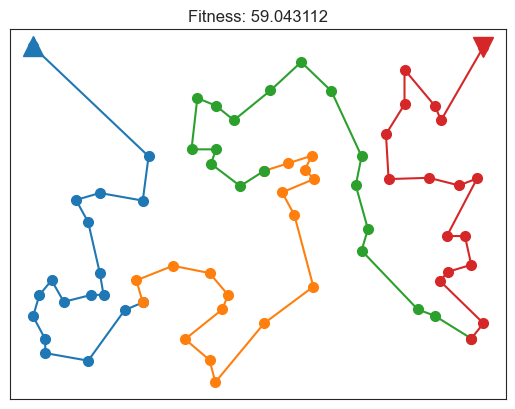

In [10]:
run_genetic_algorithm(generations=10000, population_size=100)

Simulated Annealing:
Best Solution: ('B5P10', 'B4P4', 'B2P11', 'B3P10', 'B5P5', 'B2P12', 'B4P10', 'B1P3', 'B1P8', 'B5P2', 'B4P5', 'B4P1', 'B1P9', 'B7P3', 'B1P6', 'B5P3', 'B1P7', 'B5P8', 'B3P9', 'B3P3', 'B4P9', 'B5P7', 'B2P7', 'B4P7', 'B2P9', 'B7P2', 'B3P11', 'B4P6', 'B1P12', 'B3P4', 'B6P8', 'B5P1', 'B2P1', 'B2P8', 'B2P2', 'B1P5', 'B4P11', 'B3P1', 'B1P10', 'B2P3', 'B6P1', 'B7P7', 'B1P2', 'B3P7', 'B6P12', 'B5P11', 'B4P8', 'B5P9', 'B2P10', 'B1P1', 'B6P2', 'B1P4', 'B3P6', 'B7P6', 'B5P4', 'B4P3', 'B2P6', 'B2P5', 'B6P5', 'B4P2', 'B2P4', 'B6P11', 'B3P2', 'B7P1', 'B1P11', 'B3P5', 'B5P6', 'B3P8')
Best Fitness: 90.95286824506671


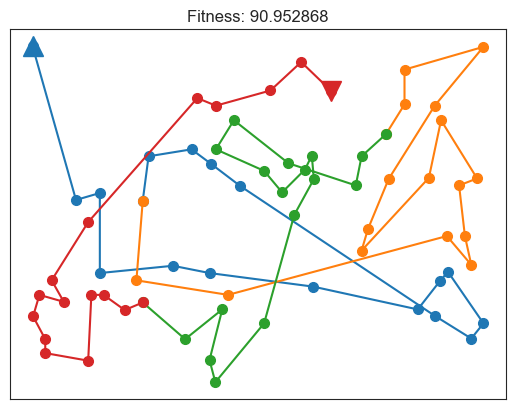

In [11]:
# Constants
INITIAL_TEMPERATURE = 1000.0
COOLING_RATE = 0.95

def simulated_annealing(initial_solution, compute_fitness, generate_neighbor, max_iterations=10000):
    current_solution = initial_solution
    current_fitness = compute_fitness(current_solution)
    best_solution = current_solution
    best_fitness = current_fitness

    temperature = INITIAL_TEMPERATURE

    for iteration in range(max_iterations):
        # Generate a neighboring solution
        neighbor_solution = generate_neighbor(current_solution)
        neighbor_fitness = compute_fitness(neighbor_solution)

        # Accept the neighbor solution if it is better or with a probability based on temperature
        if neighbor_fitness < current_fitness or random.uniform(0, 1) < math.exp((current_fitness - neighbor_fitness) / temperature):
            current_solution = neighbor_solution
            current_fitness = neighbor_fitness

        # Update the best solution
        if current_fitness < best_fitness:
            best_solution = current_solution
            best_fitness = current_fitness

        # Cool down the temperature
        temperature *= COOLING_RATE

    return best_solution, best_fitness

# Function to generate a neighboring solution by swapping two random locations
def generate_neighbor(current_solution):
    current_solution = list(current_solution)
    index1, index2 = random.sample(range(len(current_solution)), 2)
    current_solution[index1], current_solution[index2] = current_solution[index2], current_solution[index1]
    return tuple(current_solution)

# Run the Simulated Annealing algorithm
initial_solution = generate_random_agent()  # Assuming you have a function to generate a random agent
best_solution_sa, best_fitness_sa = simulated_annealing(initial_solution, compute_fitness, generate_neighbor)

# Print the results
print("Simulated Annealing:")
print("Best Solution:", best_solution_sa)
print("Best Fitness:", best_fitness_sa)

# Plot the trajectory
plot_trajectory(best_solution_sa)
